In [2]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default')

#sns.set(style="whitegrid")

sns.set(style="darkgrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format

train = pd.read_csv('data/train.csv')
#train = pd.read_csv('C:/Users/Alan Camussi/Desktop/train.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [3]:
train.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [4]:
#Podemos ver la memoria total utilizada en MB. Para ver cuanta memoria consume cada columna, hacer train.memory_usage()
(train.memory_usage() / (1024 * 1024)).sum()

42.1143798828125

In [5]:
dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'object', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'float64', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.

train_optimized = pd.read_csv('data/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)
train_optimized.dtypes

id                               int32
titulo                          object
descripcion                     object
tipodepropiedad               category
direccion                       object
ciudad                          object
provincia                     category
antiguedad                     float16
habitaciones                   float16
garages                        float16
banos                          float16
metroscubiertos                float16
metrostotales                  float16
idzona                         float64
lat                            float64
lng                            float64
fecha                           object
gimnasio                       float16
usosmultiples                  float16
piscina                        float16
escuelascercanas               float16
centroscomercialescercanos     float16
precio                         float32
dtype: object

In [6]:
#Se puede observar que el memory usage bajó más de la mitad
(train_optimized.memory_usage() / (1024 * 1024)).sum()

21.97503662109375

In [7]:
train_optimized['Precio_ARS'] = train_optimized.precio.map(lambda monto: monto*2.78)
train_optimized.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Precio_ARS
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00","6,318,940.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00","10,008,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00","3,336,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00","1,807,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00","3,197,000.00"


In [8]:
train_prov = train_optimized[['provincia']]
train_tipoprop = train_optimized[['tipodepropiedad']]
tabla1 = train_tipoprop['tipodepropiedad'].value_counts()

In [9]:
tipos_vendidos=pd.concat([tabla1],axis=1)
tipos_vendidos.columns = ['Tipos de propiedad']

Text(0, 0.5, 'Cantidad')

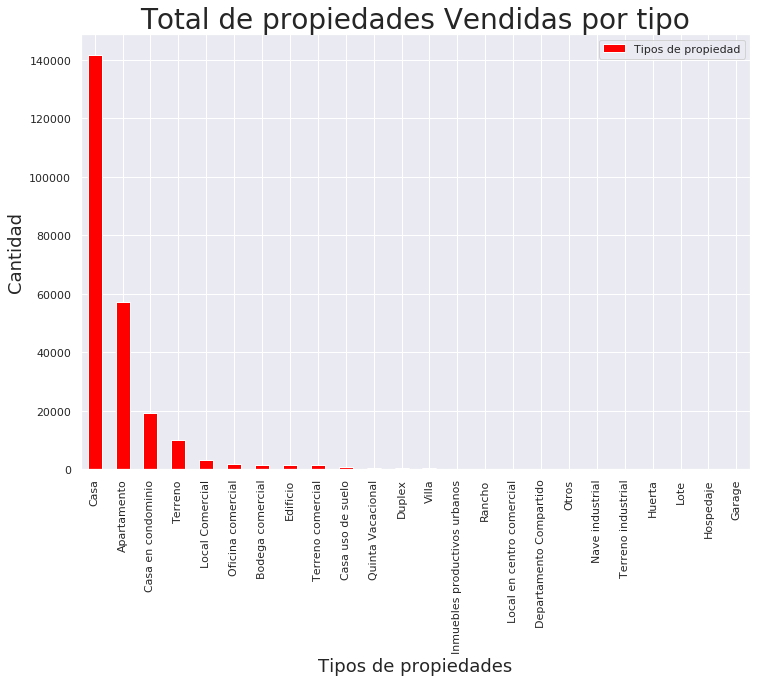

In [10]:
# Mas del 50% del total de propiedades vendidas son Casas (58.33% aprox)

g = tipos_vendidos.plot.bar(color=["Red"],figsize=(12,8))
g.set_title("Total de propiedades Vendidas por tipo", fontsize=28)
g.set_xlabel("Tipos de propiedades",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)

## Hago columnas nuevas con año, mes, día

In [11]:
train_optimized['año'],train_optimized['mes'],train_optimized['dia']= train_optimized['fecha'].str.split(' ').str[0].str.split('-').str
train_optimized

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Precio_ARS,año,mes,dia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,"2,273,000.00","6,318,940.00",2015,08,23
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,0.00,0.00,0.00,1.00,1.00,"3,600,000.00","10,008,000.00",2013,06,28
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,"1,200,000.00","3,336,000.00",2015,10,17
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,0.00,0.00,0.00,1.00,1.00,"650,000.00","1,807,000.00",2012,03,09
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,"1,150,000.00","3,197,000.00",2016,06,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,"650,000.00","1,807,000.00",2015,02,08
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.00,3.00,3.00,...,0.00,0.00,0.00,1.00,1.00,"1,940,000.00","5,393,200.00",2014,07,10
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,"3,400,000.00","9,452,000.00",2015,03,03
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.00,4.00,0.00,...,1.00,0.00,0.00,1.00,1.00,"2,890,000.00","8,034,200.00",2014,12,26


In [36]:
t1 = train_optimized
t1['tipodepropiedad'] = 1
for_heatmap = t1.pivot_table(index='mes', columns='dia', values='tipodepropiedad', aggfunc='sum')

Text(30.5, 0.5, 'Mes')

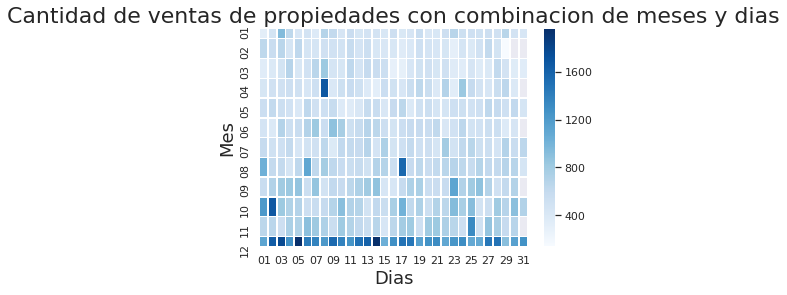

In [13]:
# Cantidad de ventas de propiedades por dias de cada mes

g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de ventas de propiedades con combinacion de meses y dias", fontsize=22)
g.set_xlabel("Dias",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

## Analisis Pileta 

In [14]:
train_optimized['precio_metro_usd'] = (train_optimized['precio']/train_optimized['metrostotales']) * 0.051
train_pool = train_optimized.loc[(train_optimized['piscina'] == 1)]
train_pool_prov = train_pool.groupby('provincia').agg({'id':'count'})
train_pool_prov = train_pool_prov.reset_index()
train_pool_prov = train_pool_prov[['provincia', 'id']].sort_values(by='id', ascending=False)
train_pool_prov = train_pool_prov.rename(columns={'id':'cantidad_propiedades'})
train_pool_prov

,provincia,cantidad_propiedades
16,Morelos,3066
8,Distrito Federal,2627
14,Jalisco,2482
10,Edo. de México,2330
21,Querétaro,2054
30,Yucatán,1923
22,Quintana Roo,1677
12,Guerrero,1511
18,Nuevo León,819
29,Veracruz,581


# Cantidad de Propiedades en cada provincia

In [15]:
train['precio_metro_usd'] = (train['precio']/train['metrostotales']) * 0.051
train_pool = train.loc[(train['piscina'] == 1)]
train_pool.provincia.value_counts()

Morelos                  3066
Distrito Federal         2627
Jalisco                  2482
Edo. de México           2330
Querétaro                2054
Yucatán                  1923
Quintana Roo             1677
Guerrero                 1511
Nuevo León                819
Veracruz                  581
Puebla                    301
Nayarit                   224
Aguascalientes            168
Guanajuato                146
Sonora                    140
Sinaloa                   134
Chihuahua                  93
Colima                     92
Hidalgo                    86
Tabasco                    74
San luis Potosí            73
Baja California Sur        73
Tamaulipas                 70
Baja California Norte      54
Coahuila                   51
Chiapas                    32
Michoacán                  26
Oaxaca                     22
Durango                    17
Campeche                    7
Tlaxcala                    3
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con pileta por provincia')

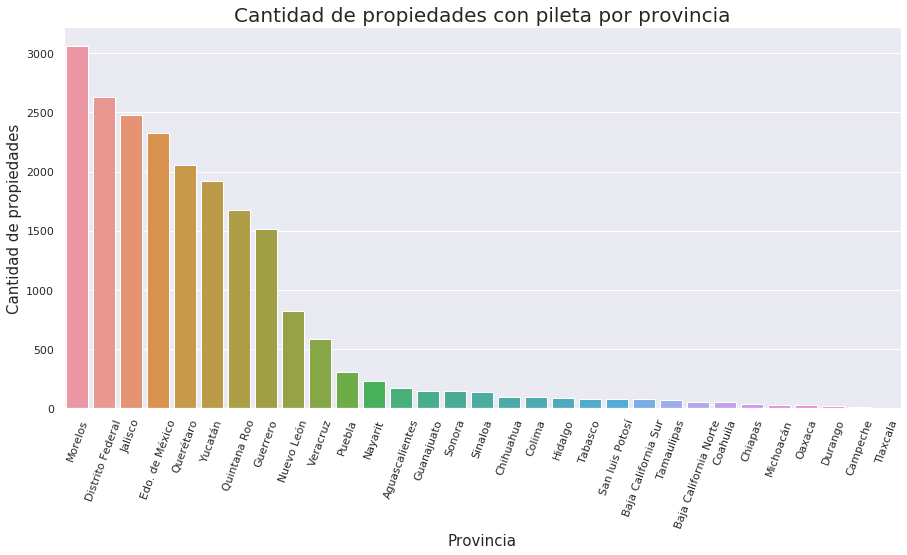

In [25]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_pool, order=train_pool['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia" , fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con pileta por provincia", fontsize=20)

In [26]:
train_pool.tipodepropiedad.value_counts()

Casa                       9109
Apartamento                8095
Casa en condominio         2973
Terreno                     489
Villa                       145
Quinta Vacacional           116
Departamento Compartido      26
Rancho                       14
Terreno comercial             2
Oficina comercial             1
Edificio                      1
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con pileta por tipo')

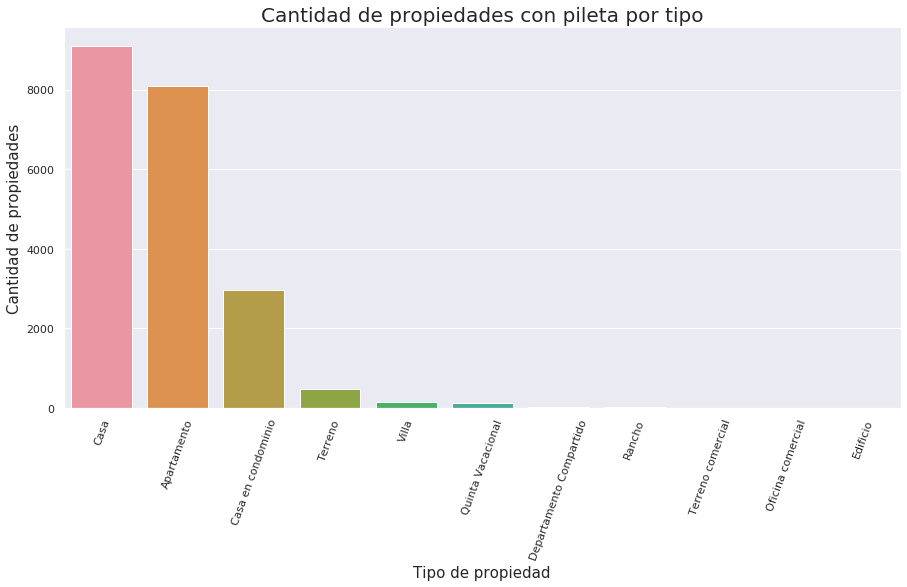

In [27]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_pool, order=train_pool['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con pileta por tipo", fontsize=20)


In [37]:
train_piscina = train.loc[(train['piscina'] == 1)]
train_piscina.provincia.value_counts()

Morelos                  3066
Distrito Federal         2627
Jalisco                  2482
Edo. de México           2330
Querétaro                2054
Yucatán                  1923
Quintana Roo             1677
Guerrero                 1511
Nuevo León                819
Veracruz                  581
Puebla                    301
Nayarit                   224
Aguascalientes            168
Guanajuato                146
Sonora                    140
Sinaloa                   134
Chihuahua                  93
Colima                     92
Hidalgo                    86
Tabasco                    74
San luis Potosí            73
Baja California Sur        73
Tamaulipas                 70
Baja California Norte      54
Coahuila                   51
Chiapas                    32
Michoacán                  26
Oaxaca                     22
Durango                    17
Campeche                    7
Tlaxcala                    3
Name: provincia, dtype: int64

In [38]:
train_piscina

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_metro_usd
18,40421,últimos terrenos en preventa!! en bukara coto ...,"terreno ubicado en bukara coto club, el cual s...",Terreno,Milenio,Querétaro,Querétaro,nan,nan,0.00,...,nan,nan,2016-12-03 00:00:00,0.00,0.00,1.00,1.00,1.00,"794,078.00",246.94
35,294582,"venta de casa en condominio, alberca, áreas ve...",<p>for le ofrece a la venta esta casa en co...,Casa en condominio,"Venta de casa en condominio, alberca, áreas ve...",Emiliano Zapata,Morelos,0.00,2.00,2.00,...,nan,nan,2014-03-20 00:00:00,0.00,0.00,1.00,0.00,0.00,"985,000.00",810.24
43,224685,renta en acapulco con alberca prvada vista a b...,bonito departamento cerca de sam´s club farall...,Apartamento,RANCHO ACAPULCO,Acapulco de Juárez,Guerrero,3.00,2.00,1.00,...,nan,nan,2014-06-29 00:00:00,0.00,0.00,1.00,1.00,1.00,"1,450,000.00",821.67
64,171944,nuevo al poniente y en parcialidades.,un nuevo estilo de vida al sur de la ciudad. \...,Apartamento,Av. de las Torres,Alvaro Obregón,Distrito Federal,0.00,2.00,2.00,...,19.33,-99.24,2016-12-10 00:00:00,1.00,1.00,1.00,1.00,1.00,"3,500,000.00","1,785.00"
68,182136,excelente casa en cuernavaca para fin de semana,": excelente casa en condominio, con sala comed...",Casa en condominio,PASEO DEL MANANTIAL COLONIA PASEOS DE TEZOYUCA,Emiliano Zapata,Morelos,5.00,3.00,2.00,...,18.80,-99.20,2015-12-11 00:00:00,0.00,0.00,1.00,1.00,1.00,"1,500,000.00",579.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239926,220884,hermosa casa a la venta en residencial jade,hermosa casa con 65 mtrs2 de construccion al s...,Casa,"Residencial Jade, Cancún",Cancún,Quintana Roo,3.00,2.00,1.00,...,nan,nan,2016-10-01 00:00:00,0.00,0.00,1.00,1.00,1.00,"850,000.00",318.75
239952,252801,departamento lo alto,excelente departamento en renta (amueblado $45...,Apartamento,Blvd. Bosque Real,Huixquilucan,Edo. de México,5.00,3.00,3.00,...,nan,nan,2015-10-06 00:00:00,1.00,1.00,1.00,1.00,1.00,"7,050,000.00","1,218.81"
239959,270936,"casa en venta en xcanatún, mérida",excelente casa en xcanantun nueva y muy buena ...,Casa,Xcanantun,Mérida,Yucatán,3.00,3.00,nan,...,nan,nan,2012-09-19 00:00:00,0.00,0.00,1.00,0.00,1.00,"3,200,000.00",nan
239970,123855,"residencia en las cañadas, gran oportunidad pa...","residencia en las cañadas, una gran oportunida...",Casa,Paseo de los fambruesos 3150,Zapopan,Jalisco,10.00,5.00,3.00,...,20.79,-103.36,2016-12-11 00:00:00,0.00,0.00,1.00,0.00,0.00,"3,350,000.00",nan


Text(0.5, 1.0, 'Cantidad de propiedades con piscina por tipo')

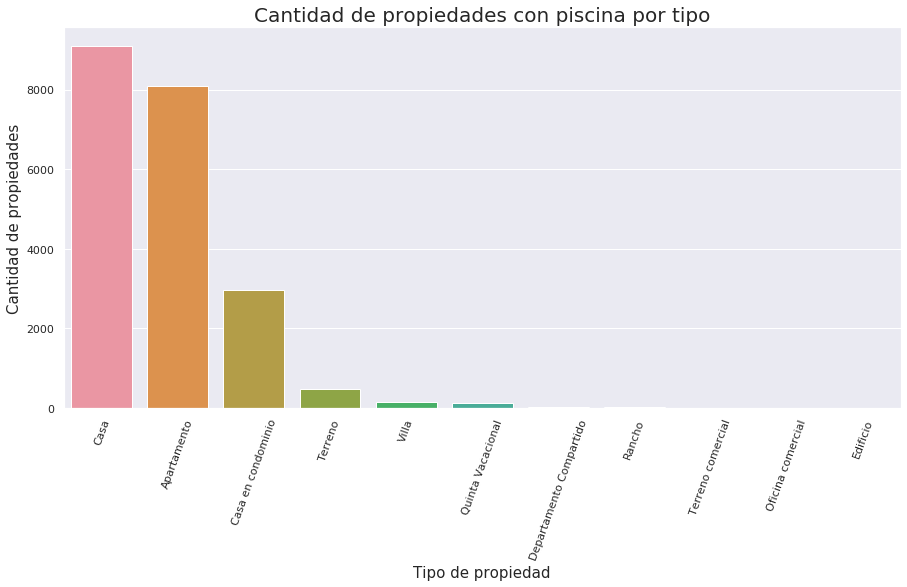

In [39]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_piscina, order=train_piscina['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con piscina por tipo", fontsize=20)

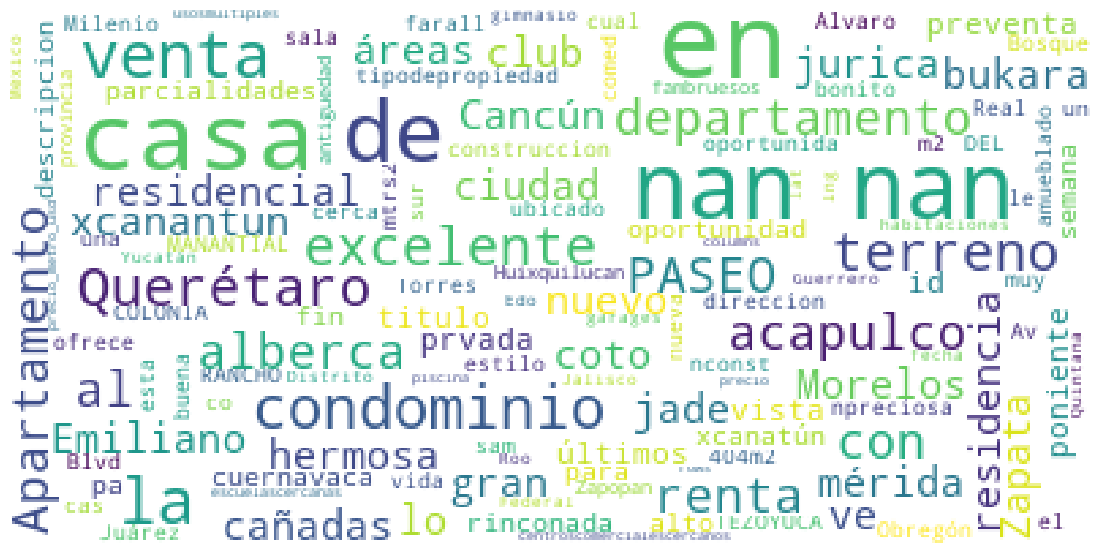

In [55]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_pool))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Cantidad de apartamentos con pileta por provincia

In [45]:
train_piscina_apartamento = train_optimized.loc[(train['piscina'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_piscina_apartamento.provincia.value_counts()

Distrito Federal         2342
Edo. de México           1743
Guerrero                 1055
Quintana Roo              685
Jalisco                   481
Nuevo León                409
Morelos                   395
Querétaro                 355
Yucatán                   158
Veracruz                  154
Puebla                    116
Nayarit                    54
Colima                     36
Tamaulipas                 21
Guanajuato                 16
Sinaloa                    13
Aguascalientes             10
Baja California Sur         9
Baja California Norte       7
Chihuahua                   6
Tabasco                     6
San luis Potosí             5
Michoacán                   4
Oaxaca                      4
Hidalgo                     3
Coahuila                    3
Durango                     1
Campeche                    1
Sonora                      1
Chiapas                     0
Tlaxcala                    0
Zacatecas                   0
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con piscina por provincia')

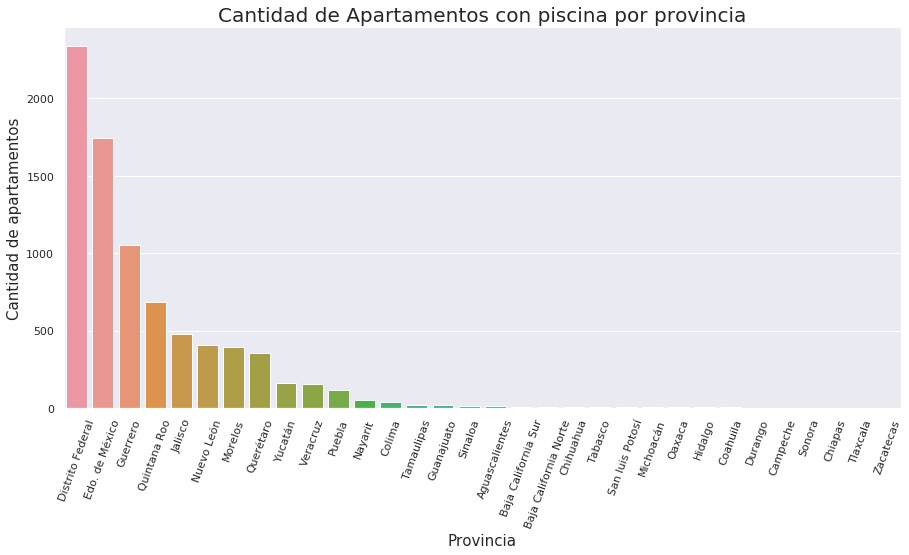

In [46]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_piscina_apartamento, order=train_piscina_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con piscina por provincia", fontsize=20)

## Cantidad de casas con pileta por provincia

In [47]:
train_piscina_casa = train_optimized.loc[(train['piscina'] == 1) & (train['tipodepropiedad'] == 'Casa')]
train_piscina_casa.provincia.value_counts()

Morelos                  1846
Yucatán                  1613
Jalisco                  1321
Querétaro                1024
Quintana Roo              676
Veracruz                  388
Edo. de México            381
Nuevo León                293
Guerrero                  205
Distrito Federal          131
Sonora                    131
Puebla                    122
Nayarit                   101
Sinaloa                    99
Guanajuato                 98
Aguascalientes             88
Chihuahua                  82
Hidalgo                    66
San luis Potosí            66
Tabasco                    56
Baja California Sur        54
Tamaulipas                 49
Colima                     46
Coahuila                   45
Baja California Norte      42
Chiapas                    27
Michoacán                  15
Oaxaca                     13
Durango                    12
Campeche                    5
Tlaxcala                    2
Zacatecas                   0
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Casas con piscina por provincia')

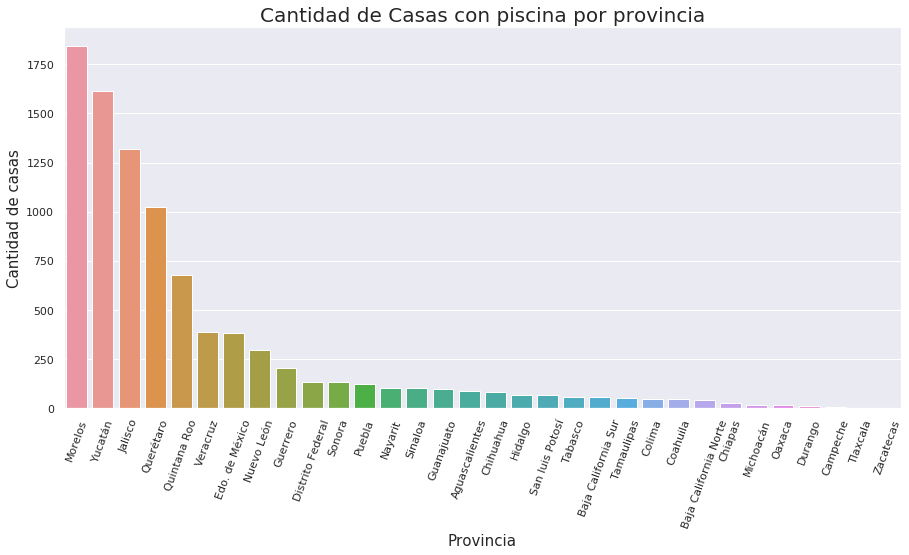

In [48]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_piscina_casa, order=train_piscina_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de Casas con piscina por provincia", fontsize=20)

## Cantidad de casas con pileta en la provincia de Morelos

In [49]:
train_piscina_casa_morelos = train_optimized.loc[(train['piscina'] == 1) & (train['tipodepropiedad'] == 'Casa') 
                                   & (train['provincia'] == 'Morelos')]

train_piscina_casa_morelos.ciudad.value_counts()

Cuernavaca               600
Yautepec                 257
Temixco                  254
Atlatlahucan             186
Jiutepec                 125
Cuautla                  113
Emiliano Zapata           92
Xochitepec                87
Tlayacapan                36
Ayala                     27
Jojutla                   25
Tepoztlán                 16
Tlaltizapán                7
Huitzilac                  5
Puente de Ixtla            4
Yecapixtla                 3
Jonacatepec                2
TlaltizapAn de Zapata      2
Miacatlán                  2
Amacuzac                   1
Tetecala                   1
Tlaquiltenango             1
Name: ciudad, dtype: int64

Text(0.5, 1.0, 'Cantidad de Casas con piscina por ciudad de Morelos')

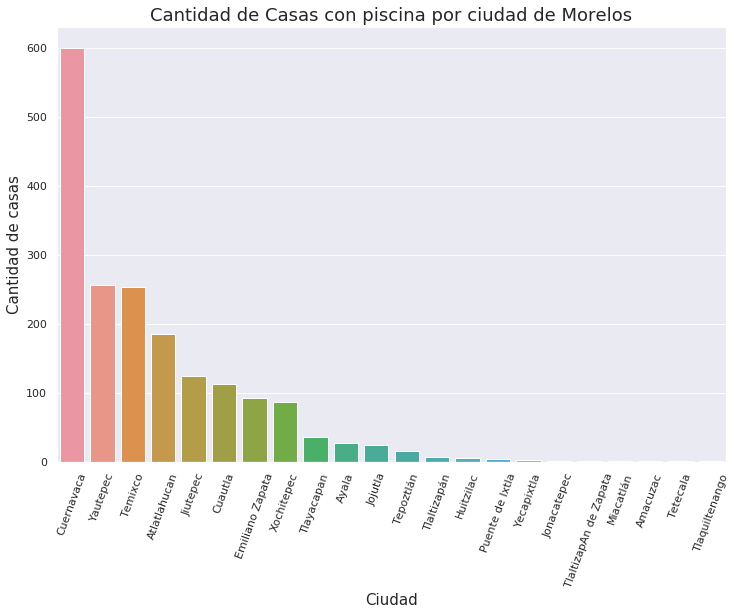

In [50]:
plt.rcParams['figure.figsize'] = (12, 8)
g = sns.countplot(x='ciudad', data=train_piscina_casa_morelos, order=train_piscina_casa_morelos.ciudad.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Ciudad", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de Casas con piscina por ciudad de Morelos", fontsize=18)

## Variación del precio de una propiedad con pileta y sin pileta

In [51]:

train_sin_atributo = train_optimized.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_conpiscina= train_optimized.loc[(train['piscina'] == 1) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_conpiscina = train_conpiscina.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_conpiscina = train_conpiscina.reset_index()
train_conpiscina = train_conpiscina[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_conpiscina = train_conpiscina.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_piscina'})

train_join_consinpiscina = pd.merge(train_sin_atributo, train_conpiscina, how = 'inner', on='provincia')
train_join_consinpiscina['variacion'] = train_join_consinpiscina['precio_metro_usd_prom'] - train_join_consinpiscina['precio_metro_usd_prom_piscina']

train_join_consinpiscina.dropna(inplace = True)
train_join_consinpiscina

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_piscina,variacion
0,Distrito Federal,"1,184.91","1,899.26",-714.35
1,Tabasco,714.54,895.07,-180.53
2,Guerrero,714.11,755.66,-41.55
3,Edo. de México,711.35,"1,222.63",-511.28
4,Nuevo León,690.50,"1,182.48",-491.98
5,Puebla,679.01,827.29,-148.28
6,Jalisco,659.74,779.28,-119.54
7,Quintana Roo,589.35,826.51,-237.16
8,Chiapas,582.54,488.65,93.89
9,Guanajuato,578.29,"1,100.56",-522.27


In [52]:
# Promedio de variacion entre el precio por metro de una propiedad con piscina y sin piscina 
train_join_consinpiscina['variacion'].mean()

-225.66064

Text(0.5, 1.0, 'Precio con Piscina vs Precio sin Piscina por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

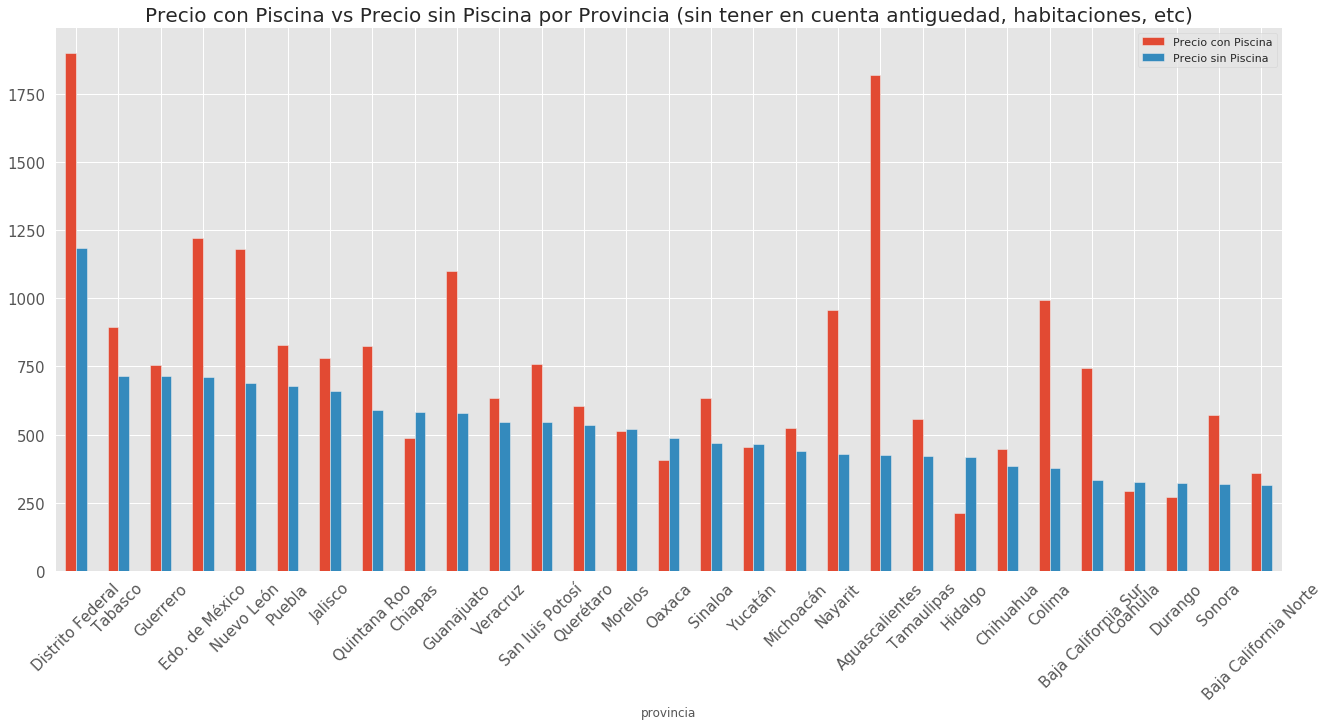

In [53]:
index = train_join_consinpiscina['provincia']
precio_conPiscina = train_join_consinpiscina['precio_metro_usd_prom_piscina'].values.tolist()
precio_sinPiscina = train_join_consinpiscina['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Piscina': precio_conPiscina,
                   'Precio sin Piscina': precio_sinPiscina}, index=index)

plt.rcParams['figure.figsize'] = (22, 10)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Piscina vs Precio sin Piscina por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

## Analisis SUM

In [62]:
train_sum = train.loc[(train['usosmultiples'] == 1)]
train_sum.provincia.value_counts()

Distrito Federal         4044
Edo. de México           3060
Jalisco                  1807
Querétaro                1154
Puebla                    742
Nuevo León                422
Guerrero                  367
Quintana Roo              355
Morelos                   261
Veracruz                  157
Hidalgo                   130
Yucatán                   128
Aguascalientes            110
Guanajuato                107
San luis Potosí            79
Sinaloa                    37
Baja California Norte      34
Michoacán                  32
Nayarit                    32
Chihuahua                  27
Sonora                     27
Coahuila                   24
Colima                     22
Durango                    21
Tabasco                    13
Chiapas                     8
Oaxaca                      6
Baja California Sur         5
Tamaulipas                  4
Tlaxcala                    3
Zacatecas                   3
Campeche                    1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con SUM por provincia')

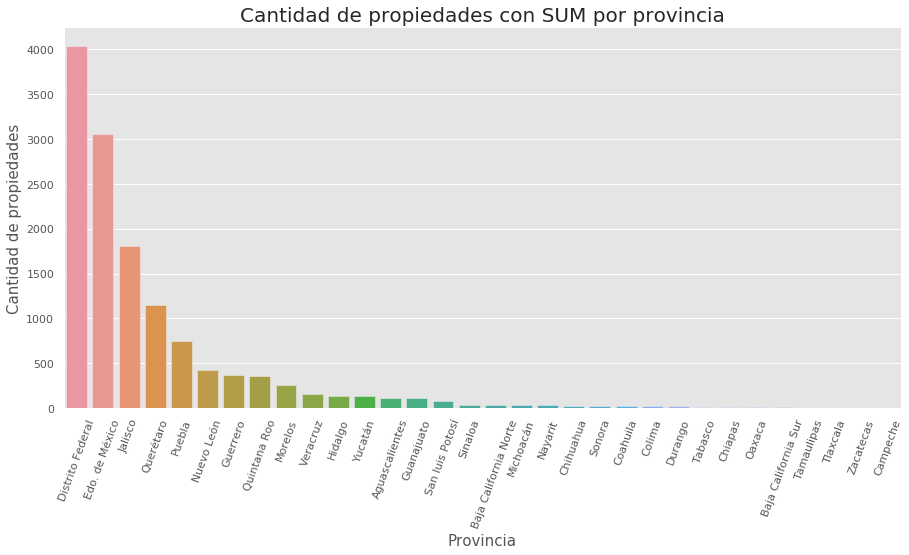

In [63]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_sum, order=train_sum['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con SUM por provincia", fontsize=20)

In [64]:
train_sum.tipodepropiedad.value_counts()

Apartamento                6187
Casa                       5099
Casa en condominio         1907
Departamento Compartido      26
Oficina comercial             2
Edificio                      1
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades con SUM por tipo')

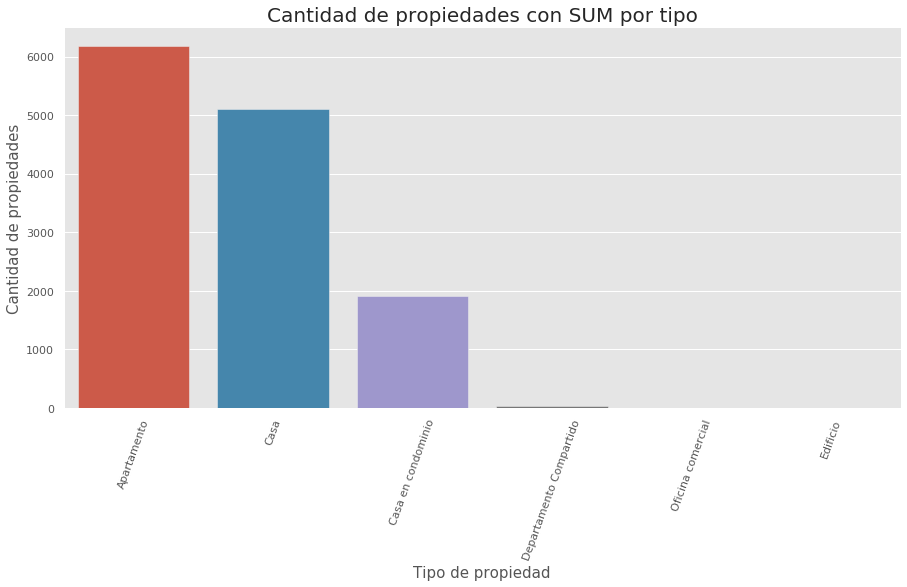

In [66]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train_sum, order=train_sum['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades con SUM por tipo", fontsize=20)

# Cantidad de apartamentos con SUM por prov

In [68]:
train_sum_apartamento = train.loc[(train['usosmultiples'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_sum_apartamento.provincia.value_counts()

Distrito Federal         3069
Edo. de México           1424
Jalisco                   342
Guerrero                  317
Nuevo León                223
Quintana Roo              220
Querétaro                 201
Puebla                    165
Morelos                    76
Veracruz                   44
Yucatán                    26
Nayarit                    12
San luis Potosí            12
Colima                     11
Guanajuato                  9
Baja California Norte       7
Michoacán                   6
Aguascalientes              6
Chihuahua                   5
Hidalgo                     3
Sinaloa                     3
Tabasco                     1
Durango                     1
Oaxaca                      1
Chiapas                     1
Coahuila                    1
Baja California Sur         1
Name: provincia, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con SUM por provincia')

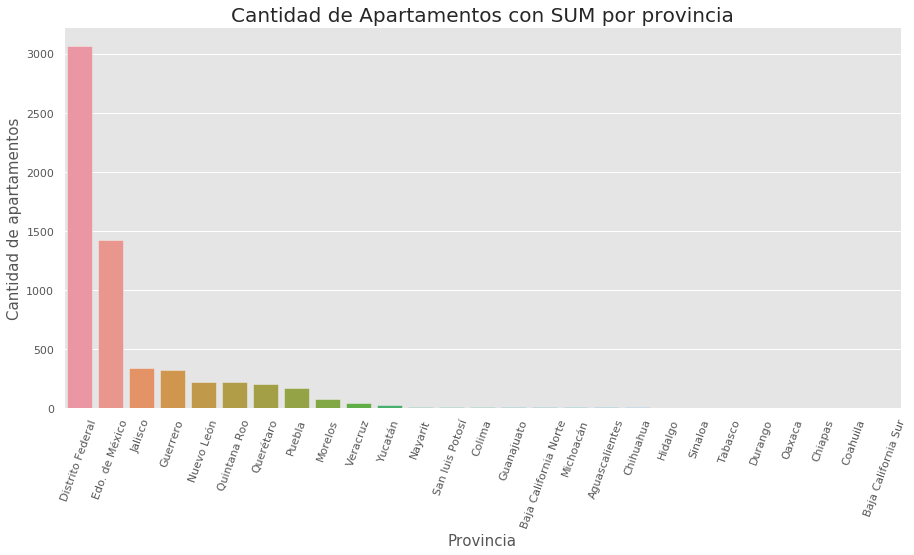

In [69]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_sum_apartamento, order=train_sum_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con SUM por provincia", fontsize=20)

## Apartamentos con SUM en DF

In [70]:
train_sum_apartamento_dfed = train.loc[(train['usosmultiples'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal')]

train_sum_apartamento_dfed.ciudad.value_counts()

Alvaro Obregón            634
Miguel Hidalgo            591
Benito Juárez             571
Cuajimalpa de Morelos     420
Cuauhtémoc                355
Tlalpan                   125
Coyoacán                  119
Azcapotzalco               97
Iztacalco                  36
Gustavo A. Madero          30
Venustiano Carranza        27
La Magdalena Contreras     25
Iztapalapa                 22
Xochimilco                 11
otra                        4
Tláhuac                     2
Name: ciudad, dtype: int64

Text(0.5, 1.0, 'Cantidad de Apartamentos con SUM por ciudad de Distrito Federal')

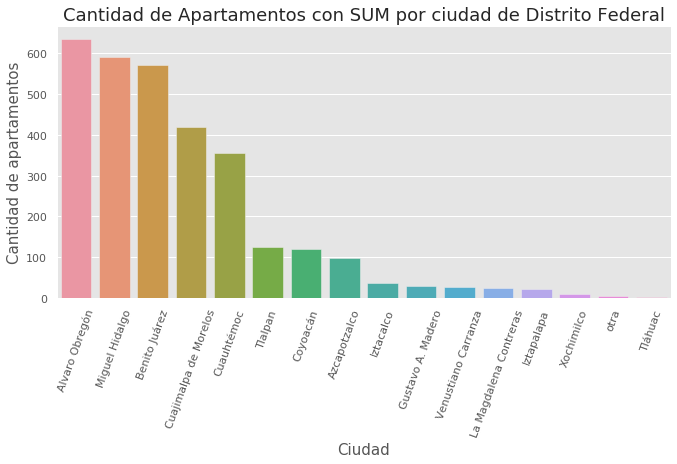

In [71]:
plt.rcParams['figure.figsize'] = (11, 5)
g = sns.countplot(x='ciudad', data=train_sum_apartamento_dfed, order=train_sum_apartamento_dfed.ciudad.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Ciudad", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de Apartamentos con SUMindex = train_join_consinpiscina['provincia']
precio_conPiscina = train_join_consinpiscina['precio_metro_usd_prom_piscina'].values.tolist()
precio_sinPiscina = train_join_consinpiscina['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Piscina': precio_conPiscina,
                   'Precio sin Piscina': precio_sinPiscina}, index=index)

plt.rcParams['figure.figsize'] = (22, 10)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Piscina vs Precio sin Piscina por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20) por ciudad de Distrito Federal", fontsize=18)

In [74]:

train_sin_atributo = train_optimized.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_consum= train_optimized.loc[(train['usosmultiples'] == 1) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['piscina'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_consum = train_consum.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_consum = train_consum.reset_index()
train_consum = train_consum[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_consum = train_consum.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_sum'})

train_join_consinsum = pd.merge(train_sin_atributo, train_consum, how = 'inner', on='provincia')
train_join_consinsum['variacion'] = train_join_consinsum['precio_metro_usd_prom'] - train_join_consinsum['precio_metro_usd_prom_sum']

train_join_consinsum.dropna(inplace = True)
train_join_consinsum

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_sum,variacion
0,Distrito Federal,"1,184.91","1,471.25",-286.34
2,Guerrero,714.11,382.50,331.61
3,Edo. de México,711.35,994.07,-282.72
4,Nuevo León,690.50,901.20,-210.70
5,Puebla,679.01,890.72,-211.71
6,Jalisco,659.74,755.12,-95.38
7,Quintana Roo,589.35,425.00,164.35
9,Guanajuato,578.29,639.87,-61.57
10,Veracruz,546.38,751.18,-204.80
11,San luis Potosí,544.32,611.75,-67.42


Text(0.5, 1.0, 'Precio con SUM vs Precio sin SUM por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

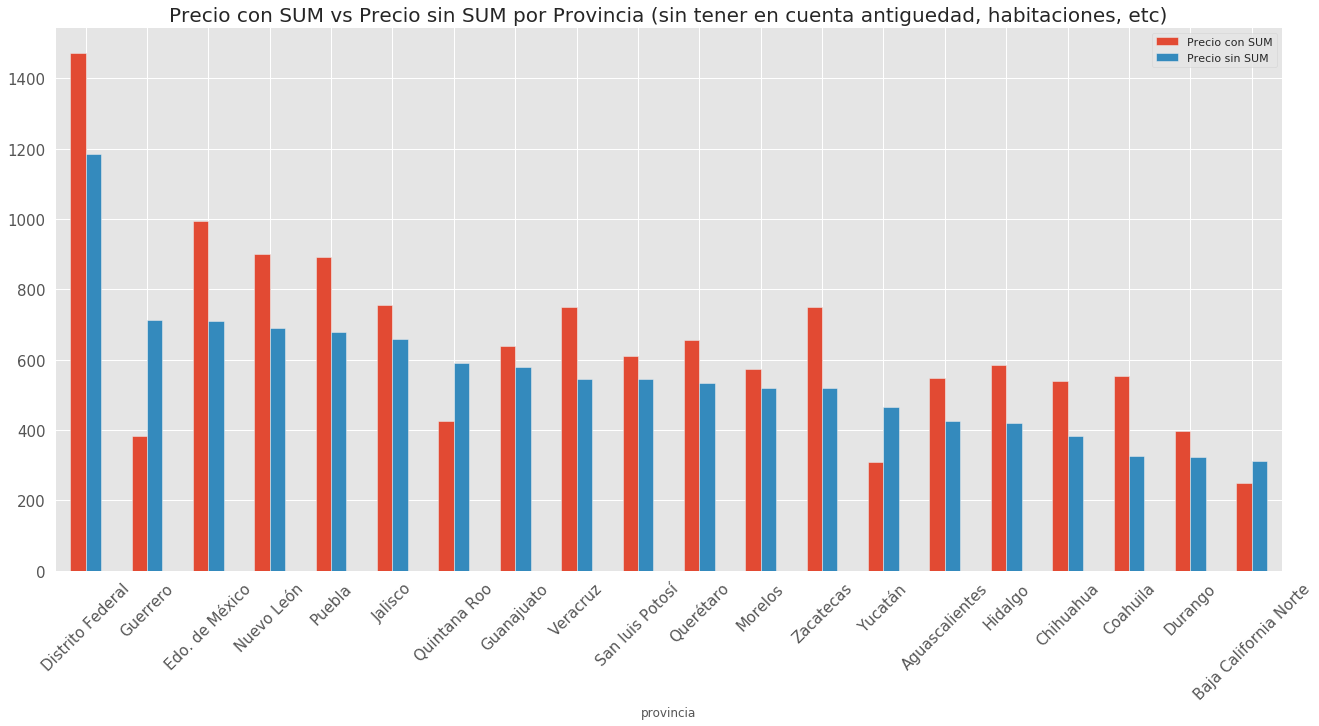

In [75]:
index = train_join_consinsum['provincia']
precio_conSum = train_join_consinsum['precio_metro_usd_prom_sum'].values.tolist()
precio_sinSum = train_join_consinsum['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con SUM': precio_conSum,
                   'Precio sin SUM': precio_sinSum}, index=index)

plt.rcParams['figure.figsize'] = (22, 10)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con SUM vs Precio sin SUM por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)